# Image classification system

### The dataset is composed of dog and cat photos provided as a subset of photos from a much larger 3 million manually annotated photos. This data was obtained through a collaboration between Petfinder.com and Microsoft.

### The data set was originally used as a CAPTCHA, i.e., a task that a human is believed to find trivial, but that a machine cannot solve, which is used on websites to distinguish between human users and bots. The task was named "Asirra". When "Asirra" was introduced, it was mentioned "that user studies indicate that humans can solve it 99.6% of the time in less than 30 seconds." Barring a breakthrough in computer vision, we expect that computers will have no more than a 1/54,000 chance of solving it.

### At the time the competition was published, the state-of-the-art result was achieved with an SVM and was described in a 2007 paper with the title "Machine Learning Attacks against Asirra's CAPTCHA" (PDF) that achieved 80% classification accuracy. It was this paper that showed that the task was no longer a suitable task for a CAPTCHA shortly after the task was proposed.

In [1]:
# Import the libraries
import os
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.losses import BinaryCrossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

### **Step 1:** Loading the dataset and visualize the input information

In [14]:
# Define the path to your dataset, where you have subdirectories for each class under train/ and test/
train_dir_source = "../data/raw/train/"
test_dir = "..//data//raw//test1//"

In [15]:
# Define the destination directory where you want to organize the dataset
train_dir = "..//data//processed//train//"

# Create subdirectories for 'cats' and 'dogs' within the destination directory
os.makedirs(os.path.join(train_dir, "cats"), exist_ok=True)
os.makedirs(os.path.join(train_dir, "dogs"), exist_ok=True)

# List all files in the source directory
files = os.listdir(train_dir_source)

# Iterate through the files and move them to the appropriate subdirectory
for file in files:
    if file.startswith("cat"):
        # Move cat images to the 'cats' subdirectory
        shutil.move(os.path.join(train_dir_source, file), os.path.join(train_dir, "cats", file))
    elif file.startswith("dog"):
        # Move dog images to the 'dogs' subdirectory
        shutil.move(os.path.join(train_dir_source, file), os.path.join(train_dir, "dogs", file))

print("Dataset organized into subdirectories.")

Dataset organized into subdirectories.


In [16]:
# Define data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # How to fill in newly created pixels after rotation or shifts
)

# Define preprocessing for the test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Set batch size
batch_size = 32

# Create generators for training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Resize images to 200x200 pixels
    batch_size=batch_size,
    class_mode= "binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode= "binary"
)

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


### **Step 3:** Build an ANN

In [5]:
set_random_seed(42)

model = Sequential()
model.add(Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [6]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [7]:
# Fit the model using the data generator
model.fit(train_generator, epochs = 2)

Epoch 1/2
782/782 [==============================] - 26715s 34s/step - loss: 0.6969 - accuracy: 0.4923
Epoch 2/2
782/782 [==============================] - 26745s 34s/step - loss: 0.6932 - accuracy: 0.4983


In [8]:
# Measure the performance of the model
_, accuracy = model.evaluate(train_generator)
print(f"Accuracy: {accuracy}")

782/782 [==============================] - 7492s 10s/step - loss: 0.6931 - accuracy: 0.5000
Accuracy: 0.5


### **Step 4:** Optimize the above model

In [18]:
# Create the object for ModelCheckpoint and EarlyStopping
checkpoint = ModelCheckpoint("../models/binary_crossentropy.h5", monitor = "accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "accuracy", patience = 3, verbose = 1, mode = "auto")

# Create the object for callback functions to fit_generator
history = model.fit(train_generator, epochs = 3, validation_data = test_generator, validation_steps = 10, callbacks = [checkpoint, early])

Epoch 1/3
782/782 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4974 
Epoch 1: accuracy improved from -inf to 0.49744, saving model to ../models\binary_crossentropy.h5


C:\Users\fevc_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 27293s 35s/step - loss: 0.6932 - accuracy: 0.4974
Epoch 2/3
782/782 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4962 
Epoch 2: accuracy did not improve from 0.49744
782/782 [==============================] - 26658s 34s/step - loss: 0.6932 - accuracy: 0.4962
Epoch 3/3
782/782 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4950 
Epoch 3: accuracy did not improve from 0.49744
782/782 [==============================] - 26909s 34s/step - loss: 0.6932 - accuracy: 0.4950


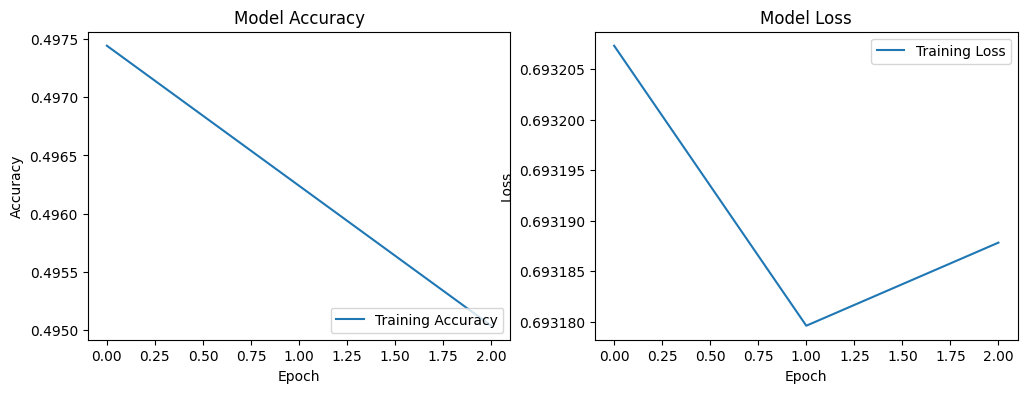

In [19]:
# Plot the performance
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# Load the saved model
model = load_model("../models/binary_crossentropy.h5")

# Evaluate the model using the test data generator
_, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy}")